# Prediction of severity (Injury/No Injury) due to crashes.

Dataset is referred from Chicago data portal. Explored dataset with the crashes in year 2022 based on weather, light condition, road condition and road surface condition. Analysed the data for crashes with primary and secondary causes.

## Data Preprocessing

In [1]:
#Installing library missingno to evaluate the missing values in the dataset
!pip install missingno

## Importing Libraries

Importing necessary libraries for the process of EDA. 

In [2]:
#importing libraries for data processing
import pandas as pd
import numpy as np
import datetime
import missingno as msno

#importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for modeling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [3]:
#ignoring warnings which are irrelavant.
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset of Chicago Crashes  

Reading csv data of crashes in 2022 from Chicago data portal

### Data Cleaning

In [4]:
#Loading the data in the format of csv file using pandas library
df = pd.read_csv('https://raw.githubusercontent.com/SriBhanuGundu/Injury_predictions_on_Chicago_Data/main/data/Traffic_Crashes.csv', low_memory=False)

In [5]:
#printing the shape of dataset of 9568 rows with 49 ccolumns
print(f'Rows: {df.shape[0]:,} | Columns: {df.shape[1]:,}')

Rows: 9,568 | Columns: 49


column names in a dataset are standardized to the upper case letters. Changed the name of Record Number column for better analysis

In [6]:
#renaming column RD_NO to RECORD_NO
df = df.rename(columns = {'RD_NO':'RECORD_NO'})

In [7]:
#checking the datatype columns names, data types and non-null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                9568 non-null   object 
 1   RECORD_NO                      8161 non-null   object 
 2   CRASH_DATE_EST_I               754 non-null    object 
 3   CRASH_DATE                     9568 non-null   object 
 4   POSTED_SPEED_LIMIT             9568 non-null   int64  
 5   TRAFFIC_CONTROL_DEVICE         9568 non-null   object 
 6   DEVICE_CONDITION               9568 non-null   object 
 7   WEATHER_CONDITION              9568 non-null   object 
 8   LIGHTING_CONDITION             9568 non-null   object 
 9   FIRST_CRASH_TYPE               9568 non-null   object 
 10  TRAFFICWAY_TYPE                9568 non-null   object 
 11  LANE_CNT                       0 non-null      float64
 12  ALIGNMENT                      9568 non-null   o

From the above data, there are 17 numerical columns and 32 categorical columns. 

In [8]:
#printing the first five rows of dataset
df.head()

,CRASH_RECORD_ID,RECORD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,003679495357f71ca1bf3627ad7272ca5630d84540bcae...,JF161652,NaN,03-03-2022 08:10,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,8,5,3,41.998309,-87.659696,POINT (-87.659696383256 41.99830880639)
1,0170e0133213239b2753a9578526769f0a63fa74431ac4...,JF162167,NaN,03-03-2022 14:44,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,4.0,0.0,14,5,3,41.708174,-87.566990,POINT (-87.566990336926 41.708174419983)
2,045ecf3a1379e43f66e17a04ff8c60030751f1c9bea065...,JF162266,NaN,03-03-2022 17:20,25,OTHER,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,17,5,3,41.906128,-87.726554,POINT (-87.726554030886 41.906127875249)
3,0613642dab2660ba54a6aa39ad6615be074c991760675b...,JF161900,NaN,03-03-2022 11:48,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,5,3,41.844935,-87.685532,POINT (-87.68553151932 41.844934632259)
4,077de0e30569c92f631f27ba72a61f3310a655beeeacf2...,JF162428,NaN,03-03-2022 19:53,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,3.0,0.0,19,5,3,41.736282,-87.621975,POINT (-87.621974858456 41.73628163141)


In [9]:
#dropping the column which had null values
df = df.drop(columns = 'INJURIES_UNKNOWN')

##### Missing Values
checking the null values in a dataset

In [10]:
#checking the null values
df.isnull().sum()

CRASH_RECORD_ID                     0
RECORD_NO                        1407
CRASH_DATE_EST_I                 8814
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
TRAFFIC_CONTROL_DEVICE              0
DEVICE_CONDITION                    0
WEATHER_CONDITION                   0
LIGHTING_CONDITION                  0
FIRST_CRASH_TYPE                    0
TRAFFICWAY_TYPE                     0
LANE_CNT                         9568
ALIGNMENT                           0
ROADWAY_SURFACE_COND                0
ROAD_DEFECT                         0
REPORT_TYPE                       262
CRASH_TYPE                          0
INTERSECTION_RELATED_I           7231
NOT_RIGHT_OF_WAY_I               9095
HIT_AND_RUN_I                    6281
DAMAGE                              0
DATE_POLICE_NOTIFIED                0
PRIM_CONTRIBUTORY_CAUSE             0
SEC_CONTRIBUTORY_CAUSE              0
STREET_NO                           0
STREET_DIRECTION                    0
STREET_NAME 

Dropping the columns with more than 90% Null values as these columns are not providing relevant information in the dataset

In [11]:
#printing percentage of null values of >90%
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
col_null = null_percent[null_percent>.90]
col_null.to_frame('Null values %').style.background_gradient(cmap='Reds')

,Null values %
CRASH_DATE_EST_I,0.921196
LANE_CNT,1.000000
NOT_RIGHT_OF_WAY_I,0.950564
PHOTOS_TAKEN_I,0.987667
STATEMENTS_TAKEN_I,0.980142
DOORING_I,0.998328
WORK_ZONE_I,0.997283
WORK_ZONE_TYPE,0.998014
WORKERS_PRESENT_I,0.999268


In [12]:
#dropping the null columns from the dataset.
null_columns = col_null.index.tolist()
df_crashes = df.drop(columns = null_columns)

Visualising the null values in the columns

Text(0, 0.5, 'Missing values')

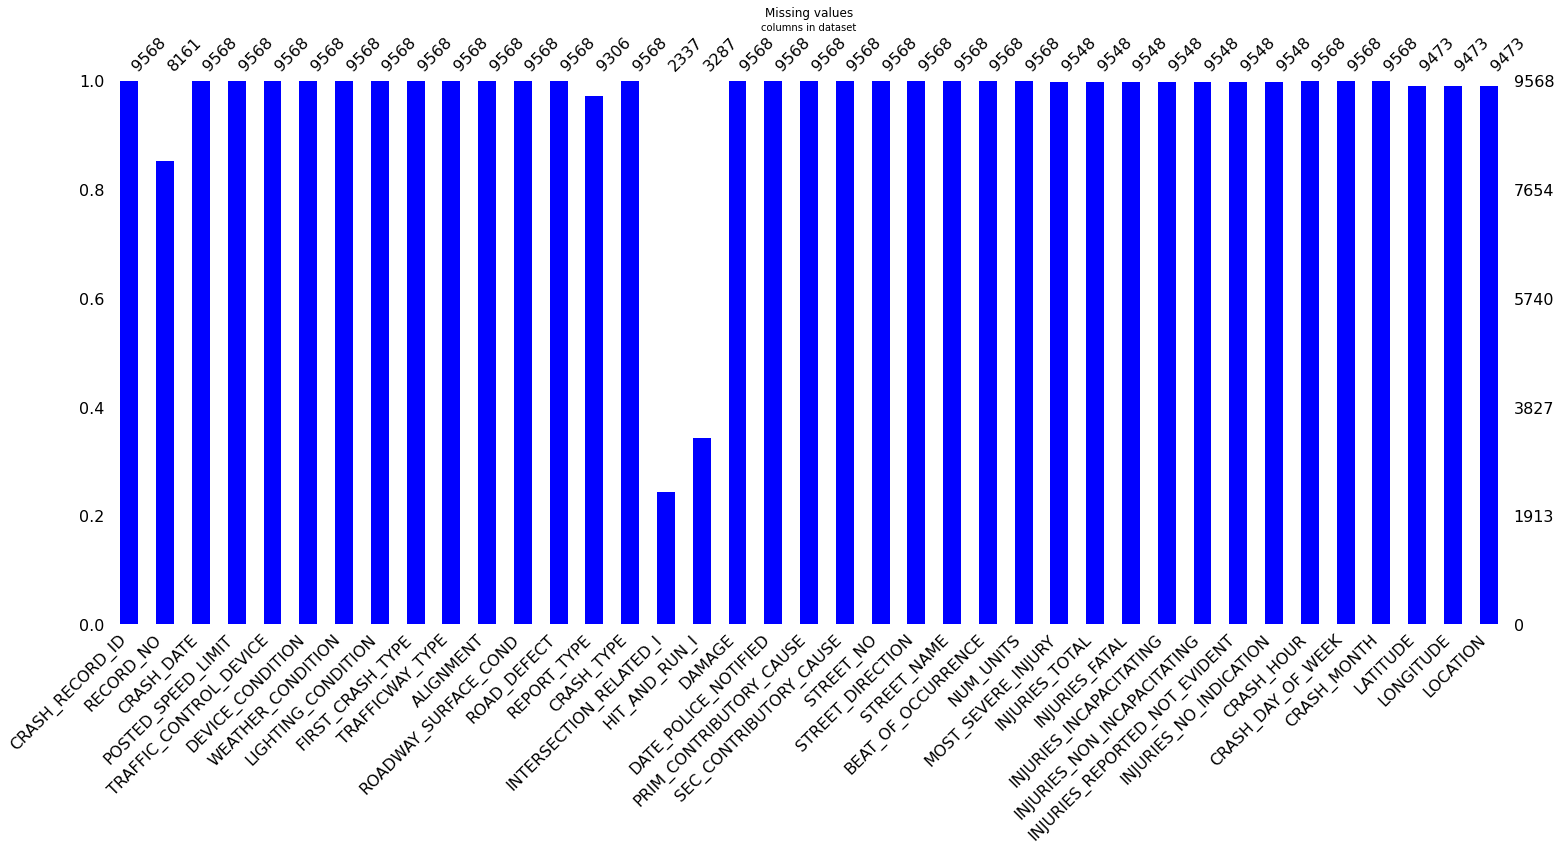

In [13]:
#visualizing the null values after dropping the columns of more than 90% null values
msno.bar(df_crashes, color = 'blue')
plt.title("Missing values")
plt.xlabel('columns in dataset')
plt.ylabel('Missing values')

Handling of missing values is done using imputation for numerical data and one hot encoding for categorical data in modeling

##### Duplicate values

In [14]:
#Finding duplicate values
df_crashes.duplicated().value_counts()

False    9568
dtype: int64

In [15]:
#Evaluating unique values
df_unique = df_crashes.drop(columns = ['LOCATION','DATE_POLICE_NOTIFIED', 'CRASH_DATE', 'RECORD_NO', 'CRASH_RECORD_ID']).select_dtypes(include = 'O')
for col in df_unique.columns:    
    print(col, df_crashes[col].unique())
    print('\n') # Break up the output between columns

TRAFFIC_CONTROL_DEVICE ['TRAFFIC SIGNAL' 'STOP SIGN/FLASHER' 'OTHER' 'NO CONTROLS' 'UNKNOWN'
 'OTHER WARNING SIGN' 'PEDESTRIAN CROSSING SIGN' 'OTHER REG. SIGN'
 'DELINEATORS' 'RAILROAD CROSSING GATE' 'YIELD' 'SCHOOL ZONE'
 'POLICE/FLAGMAN' 'FLASHING CONTROL SIGNAL' 'OTHER RAILROAD CROSSING'
 'RR CROSSING SIGN']


DEVICE_CONDITION ['FUNCTIONING PROPERLY' 'UNKNOWN' 'NO CONTROLS' 'FUNCTIONING IMPROPERLY'
 'OTHER' 'NOT FUNCTIONING' 'MISSING' 'WORN REFLECTIVE MATERIAL']


WEATHER_CONDITION ['CLEAR' 'OTHER' 'UNKNOWN' 'SNOW' 'CLOUDY/OVERCAST' 'RAIN' 'SLEET/HAIL'
 'FREEZING RAIN/DRIZZLE' 'SEVERE CROSS WIND GATE' 'BLOWING SNOW'
 'FOG/SMOKE/HAZE']


LIGHTING_CONDITION ['DAYLIGHT' 'DARKNESS, LIGHTED ROAD' 'DAWN' 'UNKNOWN' 'DUSK' 'DARKNESS']


FIRST_CRASH_TYPE ['SIDESWIPE SAME DIRECTION' 'TURNING' 'ANGLE' 'REAR END' 'PEDESTRIAN'
 'OTHER OBJECT' 'PARKED MOTOR VEHICLE' 'FIXED OBJECT' 'PEDALCYCLIST'
 'REAR TO SIDE' 'REAR TO FRONT' 'HEAD ON' 'REAR TO REAR'
 'SIDESWIPE OPPOSITE DIRECTION' 'OTHER NONCOL

From the columns of categorical data, there are no duplicate values and all the strings in columns are standardized to upper case

#### Correlation in the dataset
Evaluating correlation for the dataset

Text(0.5, 1.0, 'correlation matrix for the dataset')

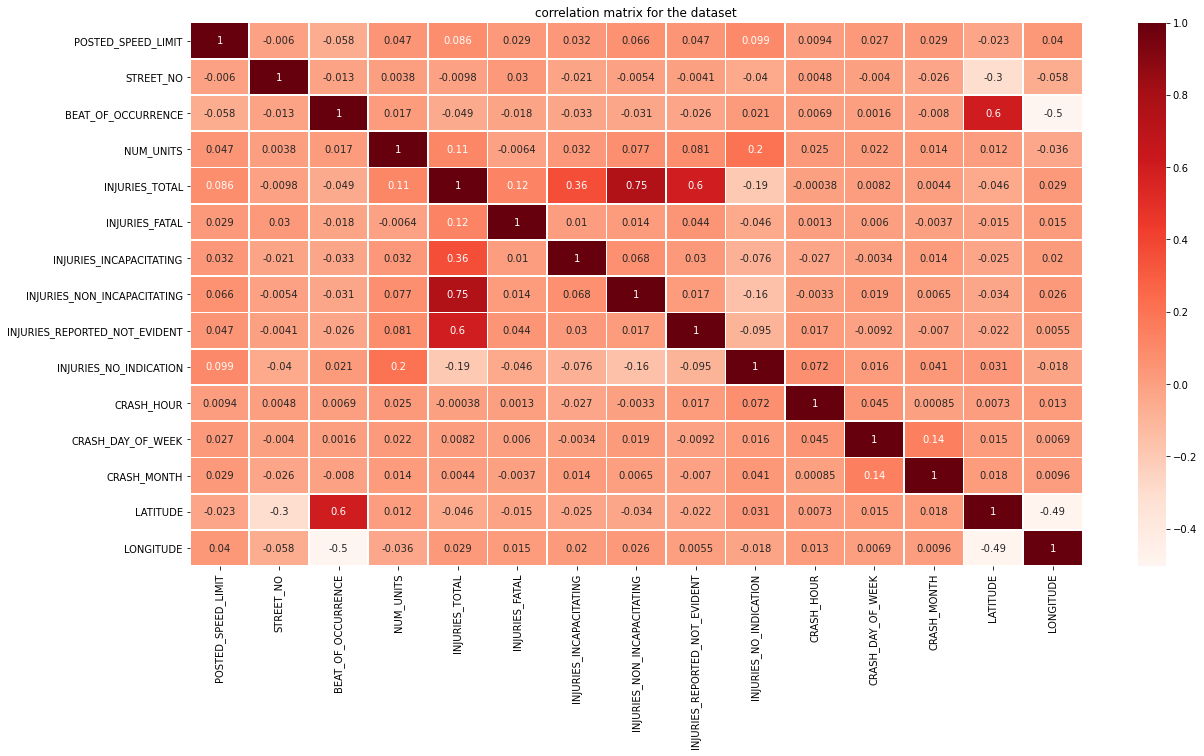

In [16]:
#correlation matrix for the data
fig, ax = plt.subplots(figsize=(20,10)) 
corr = df_crashes.corr()
sns.heatmap(corr, cmap="Reds", annot=True, linewidths=.8, ax=ax)
plt.title("correlation matrix for the dataset")

In [17]:
#dropping columns with high correlation of greater than or equal to 0.6
df_crashes = df_crashes.drop(columns = ['INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT'])

INJURIES_NON_INCAPACITATING and INJURIES_REPORTED_NOT_EVIDENT are the columns with high correlation are dropped for effective modeling and accuracy improvement

### Outliers and Skewness detection in data
From the columns data there are possible outliers in the columns are represented with box plots and the outlier which are not in interquartile range has issues of outliers

In [18]:
#evaluation of data for outliers and skewness
df_crashes.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,9568.000000,9568.000000,9568.000000,9568.000000,9548.000000,9548.000000,9548.000000,9548.000000,9568.000000,9568.000000,9568.000000,9473.000000,9473.000000
mean,28.285431,3817.274875,1237.227634,2.015259,0.174592,0.001571,0.017386,1.910871,12.984845,4.319816,2.020798,41.852479,-87.679157
std,5.915748,2878.062978,698.732184,0.435895,0.543678,0.046874,0.159577,1.061488,5.517732,1.934578,0.798691,0.087665,0.060191
min,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,41.644670,-87.936193
25%,30.000000,1428.000000,714.000000,2.000000,0.000000,0.000000,0.000000,1.000000,9.000000,3.000000,1.000000,41.778639,-87.721502
50%,30.000000,3335.000000,1131.000000,2.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,2.000000,41.867416,-87.675059
75%,30.000000,5654.250000,1814.000000,2.000000,0.000000,0.000000,0.000000,2.000000,17.000000,6.000000,3.000000,41.923723,-87.634197
max,62.000000,13781.000000,2535.000000,7.000000,8.000000,2.000000,6.000000,15.000000,23.000000,7.000000,3.000000,42.022499,-87.524589


##### Outliers

From the above table, the possible numerical columns with outlier issues are visualized in box plots and the data points outside the box indicates the problem of outliers.

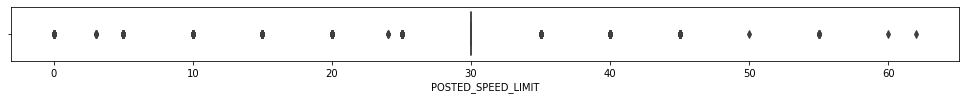

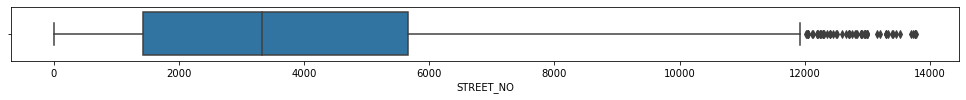

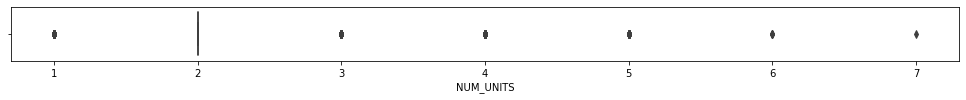

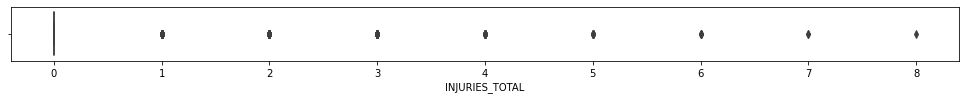

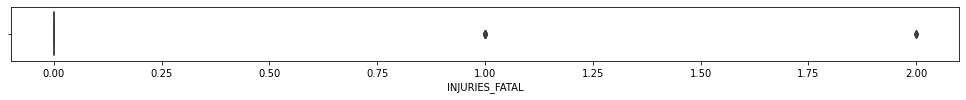

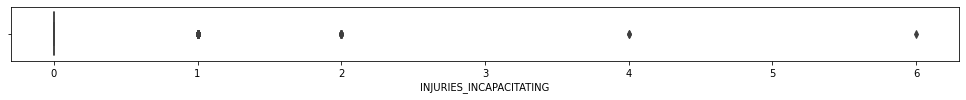

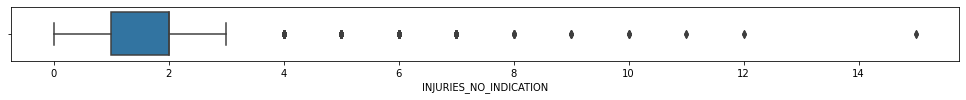

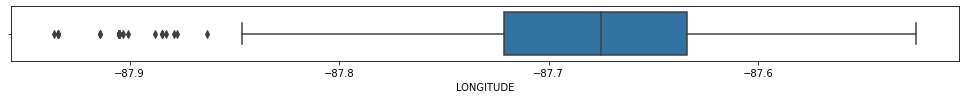

In [19]:
#Box plots for outliers
df_box = df_crashes.select_dtypes(exclude=['object'])
df_box = df_box.drop(columns = ['BEAT_OF_OCCURRENCE', 'LATITUDE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'])
for column in df_box:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_box, x=column)

##### Skewness

Data is visualized to observe skewness.

<AxesSubplot:title={'center':'Distribution plot'}, xlabel='BEAT_OF_OCCURRENCE', ylabel='Density'>

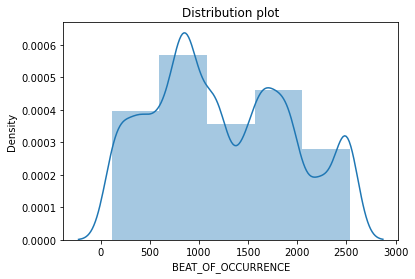

In [20]:
#Column 'BEAT_OF_OCCURANCE' is visualized
plt.title("Distribution plot")
sns.distplot(df_crashes['BEAT_OF_OCCURRENCE'], bins = 5)

Data is distributed evenly and it is in interquartile range hence no issues of outliers and skewness

<AxesSubplot:title={'center':'Distribution plot'}, xlabel='NUM_UNITS', ylabel='Density'>

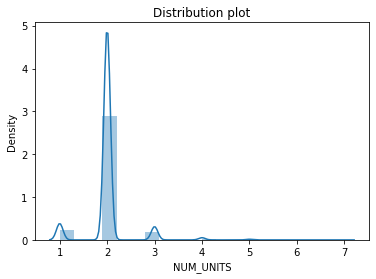

In [21]:
#Column 'NUM_UNITS' is visualized
plt.title("Distribution plot")
sns.distplot(df_crashes['NUM_UNITS'], bins = 20)

Data is negitively skewed because most of the data lies on the left side

<AxesSubplot:title={'center':'Distribution plot'}, xlabel='INJURIES_FATAL', ylabel='Density'>

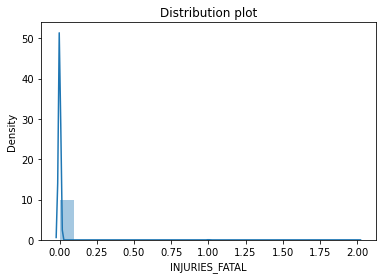

In [22]:
#Column 'INJURIES_FATAL' is visualized
plt.title("Distribution plot")
sns.distplot(df_crashes['INJURIES_FATAL'], bins = 20)

<AxesSubplot:title={'center':'Distribution plot'}, xlabel='POSTED_SPEED_LIMIT', ylabel='Density'>

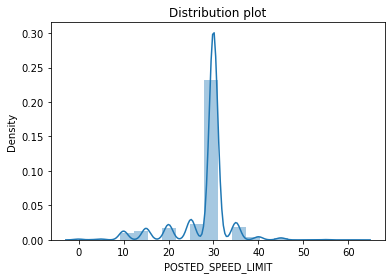

In [23]:
#Column 'POSTED_SPEED_LIMIT' is visualized
plt.title("Distribution plot")
sns.distplot(df_crashes['POSTED_SPEED_LIMIT'], bins = 20)

Columns with outlier issues are printed

In [24]:
#Calculating Interquartile range for outlier detection columns
Q1 = df_crashes.quantile(0.25)
Q3 = df_crashes.quantile(0.75)
IQR = Q3 - Q1
outlier = pd.DataFrame(IQR).rename(columns = {0:'IQR_value'})
outlier.query('IQR_value > 1.5')

,IQR_value
STREET_NO,4226.25
BEAT_OF_OCCURRENCE,1100.00
CRASH_HOUR,8.00
CRASH_DAY_OF_WEEK,3.00
CRASH_MONTH,2.00


STREET_NO, BEAT_OF_OCCURRENCE, CRASH_HOUR, CRASH_DAY_OF_WEEK and CRASH_MONTH had their interquartile range greater than 1.5 indicates the issues of outliers

Issues of outliers and skewness is handled in modeling using PCA and the variance issue is handled with dimension reduction.

## Data Visualization

Text(0.5, 1.0, 'Severity due to crashes')

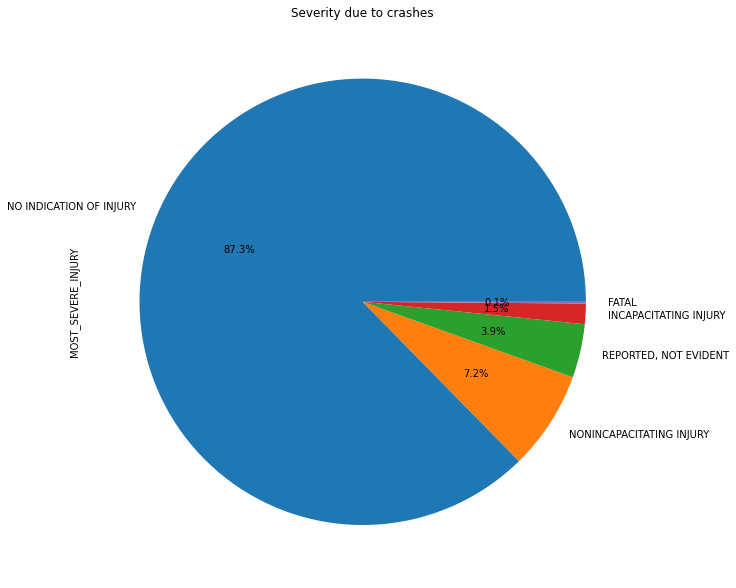

In [25]:
#Severity due to crashes (injuries, no injury)
df_crashes['MOST_SEVERE_INJURY'].value_counts().plot(kind='pie',
                            figsize=(10,15),
                            autopct='%1.1f%%'
                            )
plt.title('Severity due to crashes')

Most of the accidents happed in the city are uninjured with 87.3% in 2022 followed by non incapacitating injuries with 7.2% but the fatal percentage is 0.1%.

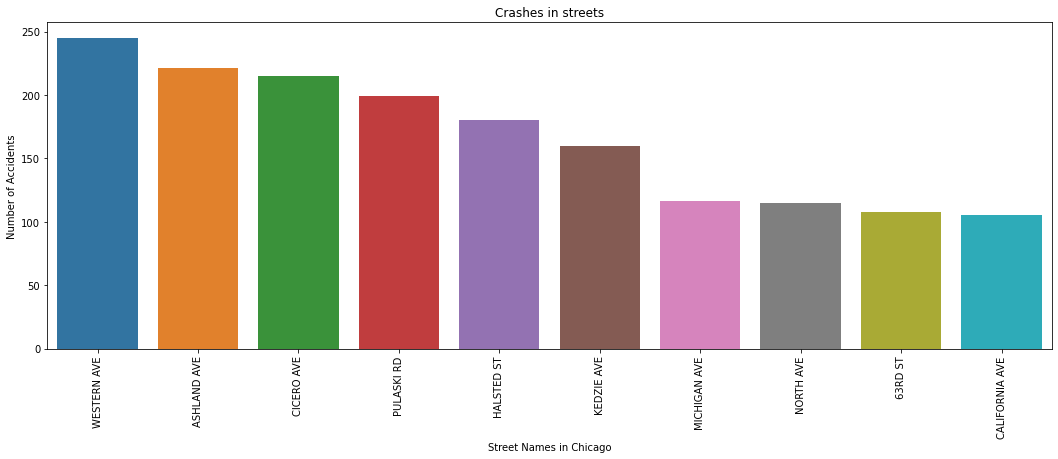

In [26]:
#Crashes in streets
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df_crashes,x='STREET_NAME',order = df_crashes['STREET_NAME'].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Crashes in streets')
plt.xlabel('Street Names in Chicago')
plt.ylabel('Number of Accidents')
plt.show()

Most of the accidents reported in the city of chicago are "Western Ave" followed by "ASHLAND AVE"

##### Reasons for crashes 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'UNABLE TO DETERMINE'),
  Text(1, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
  Text(2, 0, 'FOLLOWING TOO CLOSELY'),
  Text(3, 0, 'WEATHER'),
  Text(4, 0, 'NOT APPLICABLE'),
  Text(5, 0, 'IMPROPER OVERTAKING/PASSING'),
  Text(6, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
  Text(7, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'),
  Text(8, 0, 'IMPROPER BACKING'),
  Text(9, 0, 'IMPROPER TURNING/NO SIGNAL')])

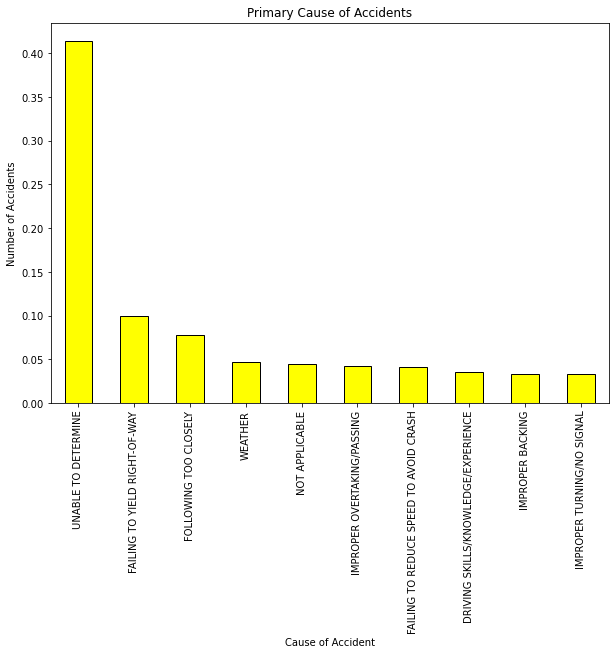

In [27]:
#bar plot of Primary contributory cause
df_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar', color = 'Yellow', edgecolor = 'black', figsize = (10,7))
plt.title('Primary Cause of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NOT APPLICABLE'),
  Text(1, 0, 'UNABLE TO DETERMINE'),
  Text(2, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'),
  Text(3, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
  Text(4, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
  Text(5, 0, 'WEATHER'),
  Text(6, 0, 'FOLLOWING TOO CLOSELY'),
  Text(7, 0, 'IMPROPER LANE USAGE'),
  Text(8, 0, 'IMPROPER OVERTAKING/PASSING'),
  Text(9, 0, 'IMPROPER TURNING/NO SIGNAL')])

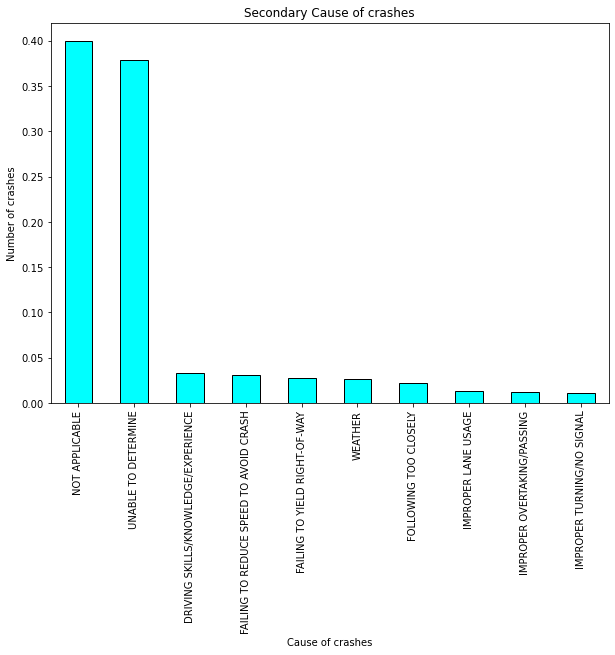

In [28]:
#bar plot of secondary contributory cause
df_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar',color = 'Cyan',edgecolor = 'black', figsize = (10,7))
plt.title('Secondary Cause of crashes')
plt.xlabel('Cause of crashes')
plt.ylabel('Number of crashes')
plt.xticks(rotation=90)

From the above plots, most of the primary and secondary resons for accidents are unable to determine. 

In [29]:
df_crashes.groupby('CRASH_TYPE')['POSTED_SPEED_LIMIT'].value_counts()

CRASH_TYPE                        POSTED_SPEED_LIMIT
INJURY AND / OR TOW DUE TO CRASH  30                    1984
                                  35                     210
                                  25                     166
                                  20                      85
                                  15                      63
                                  40                      50
                                  45                      24
                                  10                      21
                                  0                        5
                                  55                       5
                                  3                        3
                                  5                        3
                                  24                       1
                                  50                       1
                                  60                       1
NO INJURY / DRIVE AWAY          

##### Time Series Analysis

In [30]:
#Time series analysis
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes.CRASH_DATE)
df_crashes['CRASH_DAY'] = df_crashes['CRASH_DATE'].dt.day
df_crashes['CRASH_MINUTES'] = df_crashes['CRASH_DATE'].dt.minute
df_crashes['CRASH_DAYNAME'] = df_crashes['CRASH_DATE'].dt.day_name()
df_crashes['CRASH_MONTHNAME'] = df_crashes['CRASH_DATE'].dt.month_name()
df_ts = df_crashes.set_index('CRASH_DATE')
df_ts.head()

,CRASH_RECORD_ID,RECORD_NO,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_DAY,CRASH_MINUTES,CRASH_DAYNAME,CRASH_MONTHNAME
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2022-03-03 08:10:00,003679495357f71ca1bf3627ad7272ca5630d84540bcae...,JF161652,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,8,5,3,41.998309,-87.659696,POINT (-87.659696383256 41.99830880639),3,10,Thursday,March
2022-03-03 14:44:00,0170e0133213239b2753a9578526769f0a63fa74431ac4...,JF162167,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,14,5,3,41.708174,-87.566990,POINT (-87.566990336926 41.708174419983),3,44,Thursday,March
2022-03-03 17:20:00,045ecf3a1379e43f66e17a04ff8c60030751f1c9bea065...,JF162266,25,OTHER,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,17,5,3,41.906128,-87.726554,POINT (-87.726554030886 41.906127875249),3,20,Thursday,March
2022-03-03 11:48:00,0613642dab2660ba54a6aa39ad6615be074c991760675b...,JF161900,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,11,5,3,41.844935,-87.685532,POINT (-87.68553151932 41.844934632259),3,48,Thursday,March
2022-03-03 19:53:00,077de0e30569c92f631f27ba72a61f3310a655beeeacf2...,JF162428,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,19,5,3,41.736282,-87.621975,POINT (-87.621974858456 41.73628163141),3,53,Thursday,March


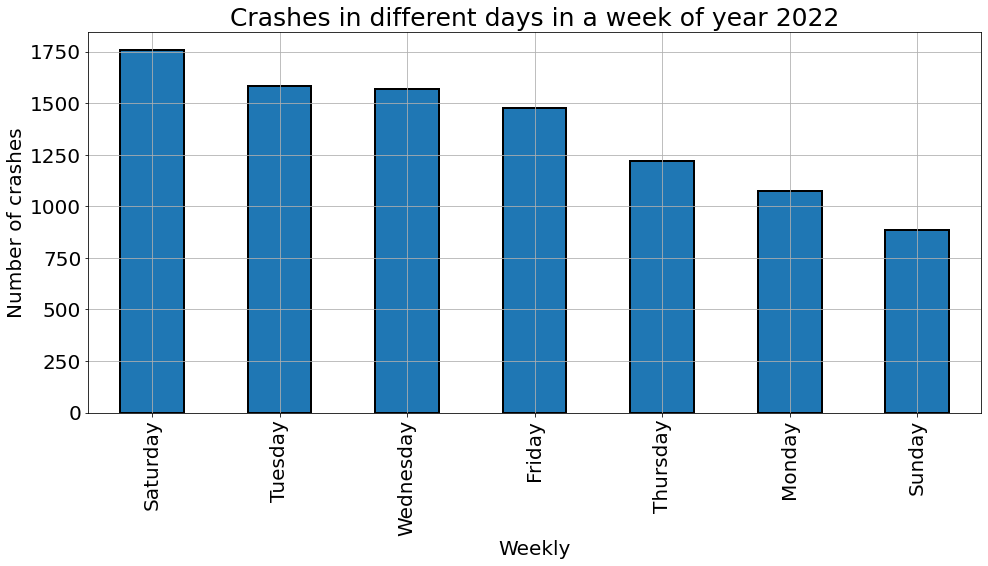

In [31]:
#Analysis of crashes on days of a week
fig, ax=plt.subplots(figsize=(16,7))
df_ts['CRASH_DAYNAME'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weekly',fontsize=20)
plt.ylabel('Number of crashes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Crashes in different days in a week of year 2022',fontsize=25)
plt.grid()
plt.ioff()

Most of the crashes happened on the day of Saturday and least on Sunday

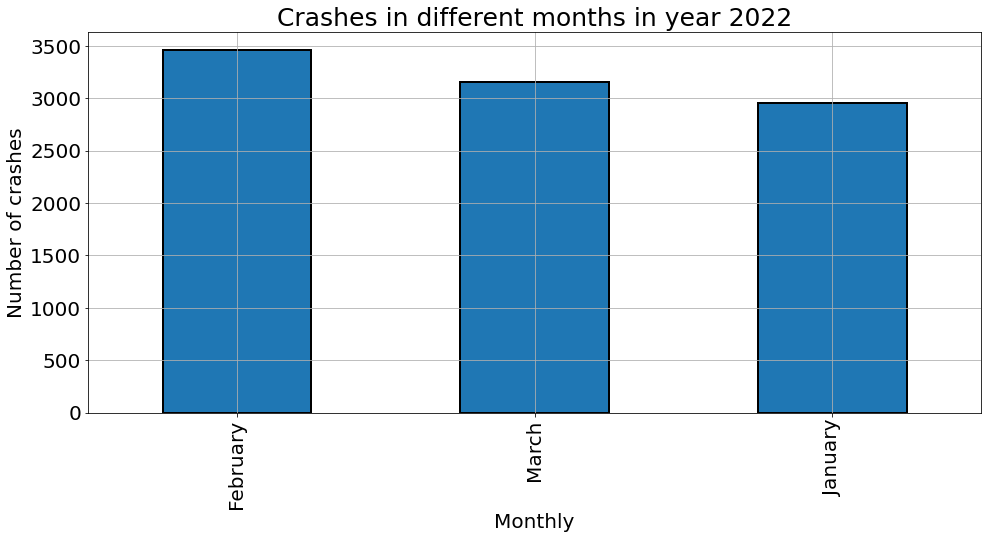

In [32]:
#Analysis of crashes in months
fig, ax=plt.subplots(figsize=(16,7))
df_ts['CRASH_MONTHNAME'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Monthly',fontsize=20)
plt.ylabel('Number of crashes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Crashes in different months in year 2022',fontsize=25)
plt.grid()
plt.ioff()

Most of the crashes happened in the month of febrauary with less accidents in January 

#### Feature Engineering

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'BLOWING SNOW'),
  Text(1, 0, 'CLEAR'),
  Text(2, 0, 'CLOUDY/OVERCAST'),
  Text(3, 0, 'FOG/SMOKE/HAZE'),
  Text(4, 0, 'FREEZING RAIN/DRIZZLE'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'RAIN'),
  Text(7, 0, 'SEVERE CROSS WIND GATE'),
  Text(8, 0, 'SLEET/HAIL'),
  Text(9, 0, 'SNOW'),
  Text(10, 0, 'UNKNOWN')])

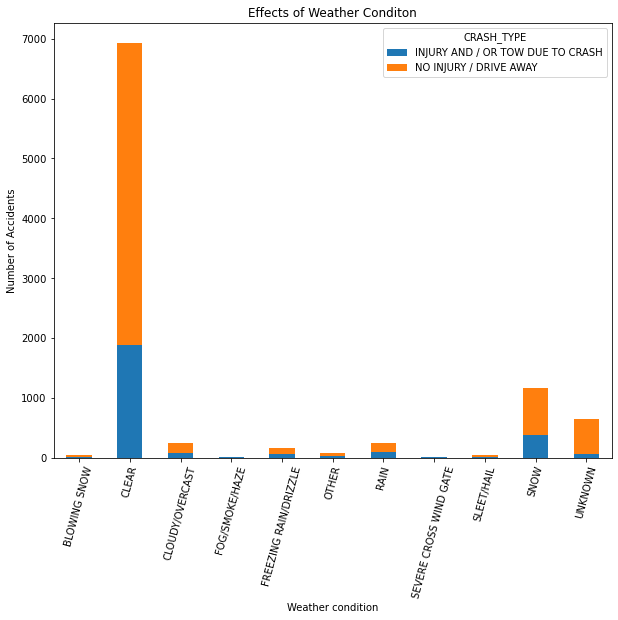

In [33]:
#Crashes due to weather conditions
weather = df.groupby(['WEATHER_CONDITION', 'CRASH_TYPE'])['WEATHER_CONDITION'].count().unstack()
weather.plot( kind='bar', stacked=True, figsize =(10,8))
plt.title('Effects of Weather Conditon')
plt.xlabel('Weather condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

Primary reson for the crashes happening in the city of Chicago is weather, in which when weather is clear most of the accidents happened followed by SNOW, Crashes that lead to injury and no injury are more during the clear weather and followed by snow in both the cases.

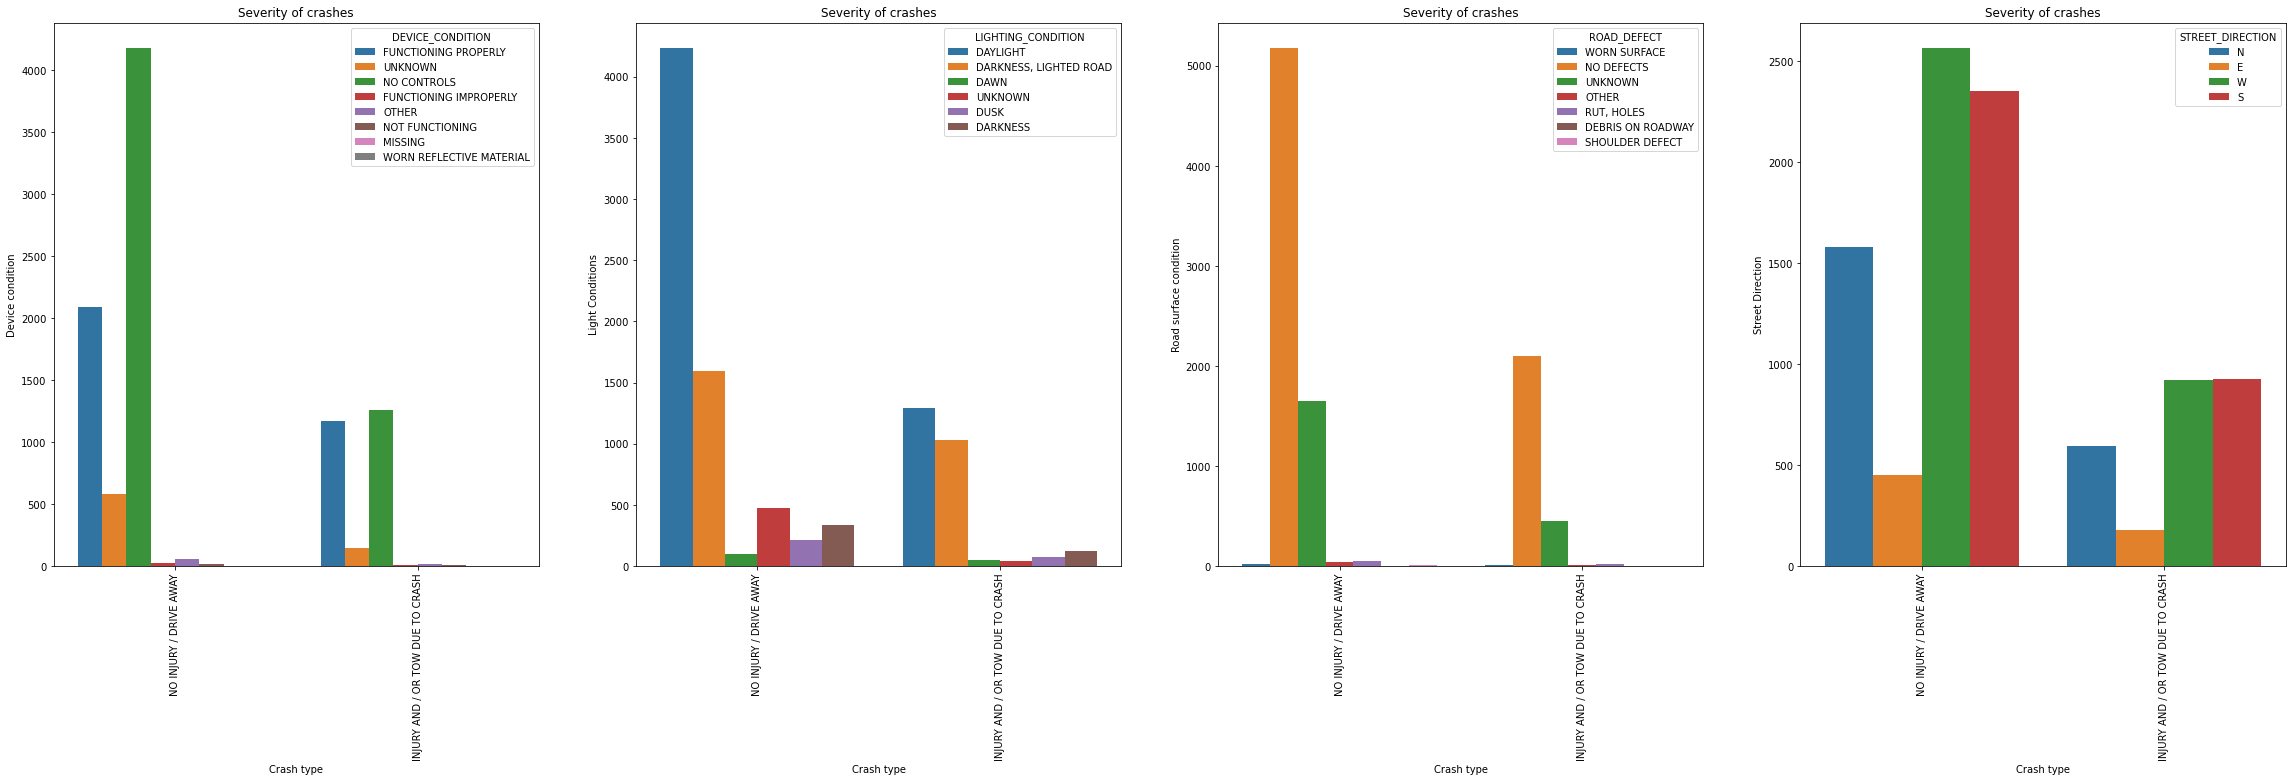

In [34]:
#crashes due to device condition
fig, ax = plt.subplots(1,4,figsize=(40,10))

ax1 = sns.countplot(data=df_crashes,x='CRASH_TYPE', hue='DEVICE_CONDITION',ax=ax[0],order = df_crashes['CRASH_TYPE'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Severity of crashes')
ax1.legend(loc = 'upper right', title = 'DEVICE_CONDITION ' )

ax1.set_xlabel('Crash type')
ax1.set_ylabel('Device condition')

#crashes due to light condition
ax2 = sns.countplot(data=df_crashes,x='CRASH_TYPE', hue='LIGHTING_CONDITION',ax=ax[1],order = df_crashes['CRASH_TYPE'].value_counts().index)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_title('Severity of crashes')
ax2.legend(loc = 'upper right', title = 'LIGHTING_CONDITION' )

ax2.set_xlabel('Crash type')
ax2.set_ylabel('Light Conditions')

#crashes due to road deffect
ax3 = sns.countplot(data=df_crashes,x='CRASH_TYPE', hue='ROAD_DEFECT',ax=ax[2],order = df_crashes['CRASH_TYPE'].value_counts().index)
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax3.set_title('Severity of crashes')
ax3.legend(loc = 'upper right', title = 'ROAD_DEFECT' )

ax3.set_xlabel('Crash type')
ax3.set_ylabel('Road surface condition')

#crashes due to street direction
ax4 = sns.countplot(data=df_crashes,x='CRASH_TYPE', hue='STREET_DIRECTION',ax=ax[3],order = df_crashes['CRASH_TYPE'].value_counts().index)
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax4.set_title('Severity of crashes')
ax4.legend(loc = 'upper right', title = 'STREET_DIRECTION' )

ax4.set_xlabel('Crash type')
ax4.set_ylabel('Street Direction')
fig.show()

From the dataset, the severity of crashes depends on the device condition of car, light condition, road condition and road surface condition.

Device condition:
Most of the crashes happened in the city of chicago in which there is no controls on the device.

Lightning condition:
In case of no injuries and injuries, Day light is the reason for most of the crashes.

Road defect: 
In both the cases of crashes, the reason for injuries and no injuries is no defects and followed by unknown defects.

Street direction:
Most of the crashes happend towards the West followed by south with or without injuries,


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '3'),
  Text(2, 0, '5'),
  Text(3, 0, '10'),
  Text(4, 0, '15'),
  Text(5, 0, '20'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '30'),
  Text(9, 0, '35'),
  Text(10, 0, '40'),
  Text(11, 0, '45'),
  Text(12, 0, '50'),
  Text(13, 0, '55'),
  Text(14, 0, '60'),
  Text(15, 0, '62')])

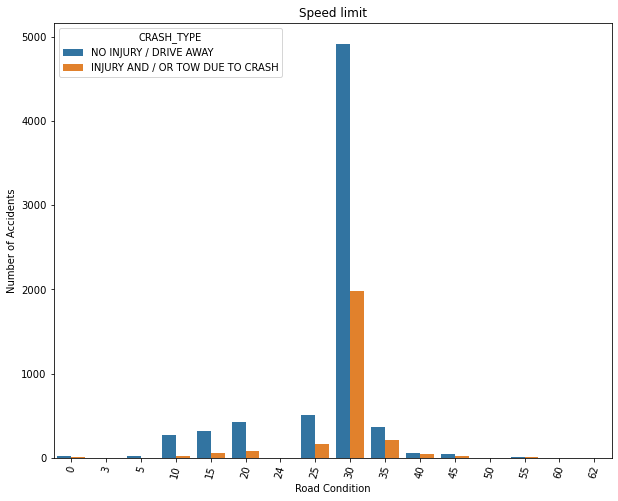

In [35]:
#visualizing speed limit
plt.figure(figsize=(10,8))
sns.countplot(x="POSTED_SPEED_LIMIT", data=df_crashes, hue="CRASH_TYPE")
plt.title('Speed limit')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

Most of the crashes with speed limit of 30 are reported high with both injuries and no injuries.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'DRY'),
  Text(1, 0, 'WET'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'SNOW OR SLUSH'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'ICE'),
  Text(6, 0, 'SAND, MUD, DIRT')])

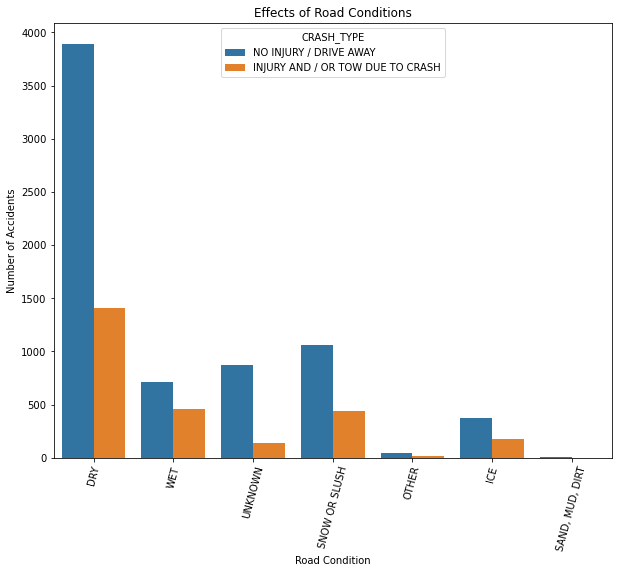

In [36]:
#visualizing road condition
plt.figure(figsize=(10,8))
sns.countplot(x="ROADWAY_SURFACE_COND", data=df, hue="CRASH_TYPE")
plt.title('Effects of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

Road surface condition:
On dry road, there are high chances of crashes with injuries and no injuries followed by snow or slush, for no injuries and wet road and snow/slushroad is reason for injuries during crashes.


## Summary on EDA:
1. Dataset from Chicago data portal on traffic crashes for year 2022 in which observed that most of the accidents happened in febrauary and on saturdays of the year, especially on the weather conditions of clear weather followed by snow, most of the crashes reported based on the primary and secondary resons are unknown. The crashes happened on the dry road with no control on the device especially on the West part of the Chicago city. The most of the crashes reported are when the speed condition is 30 and in the streets of western Ave.

2. As my target variable is crash_type, which indicates the severity of injuries during the crashes are reported to be high in the case of "no injury" as compared to the case of "injury"

3. The data is preprocessed, checked with null values, standardization of column names and categorical values, detected outliers, checked correlation of data and removed columns with high correlation, removed columns with null values more than 90% that is not providing relevant data for the modeling and checked duplicate values for effective modeling 

# Modeling

<AxesSubplot:>

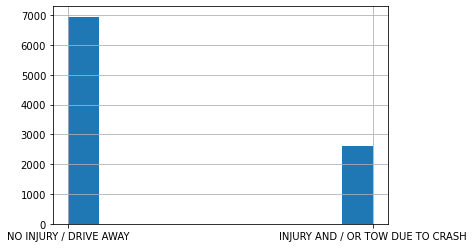

In [37]:
#choosing target variable
target = df_crashes['CRASH_TYPE']
df.CRASH_TYPE.hist()

In [38]:
#numerical and categorical variables for modeling
numeric_cols = df_crashes.select_dtypes(include = [np.number])
category_cols = df_crashes.drop(columns = ['CRASH_TYPE']).select_dtypes(include = 'O')
print("Numeric columns : \n",numeric_cols.columns)
print("\nCategory columns : \n",category_cols.columns)

numerical_vars = numeric_cols.columns.tolist()
categorical_Vars = category_cols.columns.tolist()

Numeric columns : 
 Index(['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'CRASH_DAY', 'CRASH_MINUTES'],
      dtype='object')

Category columns : 
 Index(['CRASH_RECORD_ID', 'RECORD_NO', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'LOCATION', 'CRASH_DAYNAME', 'CRASH_MONTHNAME'],
      dtype='object')


In [39]:
#splitting dataset into train and test
cat_features = [x for x in category_cols.columns if x != 'CRASH_TYPE']

features = numerical_vars + cat_features
X = df_crashes[features]
y = df_crashes['CRASH_TYPE']

# split the data to training and test datasets with 20% of data for test (test_size = 0.2) and random state of 124 (random_state = 124)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,654
Records in test data: 1,914

Features:
POSTED_SPEED_LIMIT
STREET_NO
BEAT_OF_OCCURRENCE
NUM_UNITS
INJURIES_TOTAL
INJURIES_FATAL
INJURIES_INCAPACITATING
INJURIES_NO_INDICATION
CRASH_HOUR
CRASH_DAY_OF_WEEK
CRASH_MONTH
LATITUDE
LONGITUDE
CRASH_DAY
CRASH_MINUTES
CRASH_RECORD_ID
RECORD_NO
TRAFFIC_CONTROL_DEVICE
DEVICE_CONDITION
WEATHER_CONDITION
LIGHTING_CONDITION
FIRST_CRASH_TYPE
TRAFFICWAY_TYPE
ALIGNMENT
ROADWAY_SURFACE_COND
ROAD_DEFECT
REPORT_TYPE
INTERSECTION_RELATED_I
HIT_AND_RUN_I
DAMAGE
DATE_POLICE_NOTIFIED
PRIM_CONTRIBUTORY_CAUSE
SEC_CONTRIBUTORY_CAUSE
STREET_DIRECTION
STREET_NAME
MOST_SEVERE_INJURY
LOCATION
CRASH_DAYNAME
CRASH_MONTHNAME


In [40]:
#created a pipeline to process numerical data
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

#pipelines on the training data for the numerical features that expected after dropping columns that risking multicolinearity.
X_train_num = num_pipeline.fit_transform(X_train[numerical_vars])

X_train_num

array([[ 0.28578043, -0.48976111,  1.67729314, ..., -0.18511701,
         1.28574188,  0.0692706 ],
       [ 2.81530409,  1.74188629, -0.87332259, ...,  1.24580141,
         0.71002196,  1.28127569],
       [ 0.28578043, -0.72173316,  1.10523261, ...,  0.09635205,
        -1.59285768, -0.48164081],
       ...,
       [-0.55739412,  1.48633561, -0.89912983, ...,  0.10050751,
         0.42216201,  1.39145797],
       [-3.08691778,  0.07924656,  0.67511192, ..., -0.84559865,
        -0.44141786,  0.56509086],
       [-2.24374323, -0.90273378, -1.59019042, ...,  0.94374941,
         0.71002196, -1.36309906]])

In [41]:
#created a pipeline for the categorical data
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder( drop = 'first'))])

#pipeline is fitted for the data after applying fit_transform on training data
X_train_cat = cat_pipeline.fit_transform(X_train[cat_features])

X_train_cat
print(X_train_cat.toarray())

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## References:

https://github.com/appliedecon/data602-lectures

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if